Import library

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import scipy.stats as stats

Load the files and translate the columns to english

In [93]:
weather_data = pd.read_csv("wetter.csv")
kiwo_data = pd.read_csv("kiwo.csv")
sales_data = pd.read_csv("umsatzdaten_gekuerzt.csv")
kiwo_data.rename(columns={'Datum': 'Date'}, inplace=True)
print(kiwo_data.head())
weather_data.rename(columns={
        "Datum": "Date",
        "Bewoelkung": "Cloud Cover",
        "Temperatur": "Temperature",
        "Windgeschwindigkeit": "Wind Speed",
        "Wettercode": "Weather Code",
    }, inplace=True)
print(weather_data.head())
sales_data.rename(columns={'Datum': 'Date', "Warengruppe":"Product Group", "Umsatz":"Sales Volume"}, inplace=True)
print(sales_data.head())


         Date  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1
         Date  Cloud Cover  Temperature  Wind Speed  Weather Code
0  2012-01-01          8.0       9.8250          14          58.0
1  2012-01-02          7.0       7.4375          12           NaN
2  2012-01-03          8.0       5.5375          18          63.0
3  2012-01-04          4.0       5.6875          19          80.0
4  2012-01-05          6.0       5.3000          23          80.0
        id        Date  Product Group  Sales Volume
0  1307011  2013-07-01              1    148.828353
1  1307021  2013-07-02              1    159.793757
2  1307031  2013-07-03              1    111.885594
3  1307041  2013-07-04              1    168.864941
4  1307051  2013-07-05              1    171.280754


Covert Date to datetime

In [94]:
weather_data["Date"] = pd.to_datetime(weather_data["Date"])
kiwo_data["Date"] = pd.to_datetime(kiwo_data["Date"])
sales_data["Date"] = pd.to_datetime(sales_data["Date"])

Combining the tables

In [95]:

merged_data = pd.merge(weather_data, sales_data, on='Date', how='outer')
merged_data.to_csv("data_merged.csv", index=False)
# Ensure Date is datetime
merged_data["Date"] = pd.to_datetime(merged_data["Date"], errors="coerce")
# Filter date range (inclusive)
start = pd.Timestamp("2013-07-01")
end   = pd.Timestamp("2019-07-30")
mask = (merged_data["Date"] >= start) & (merged_data["Date"] <= end)
# Make a copy to avoid SettingWithCopyWarning
data_range = merged_data.loc[mask].copy()
data_range["Product Group"]=data_range["Product Group"].fillna(0).astype('int')
data_range["Product Group"] = data_range["Product Group"].replace({1: 'Bread', 2: 'Rolls', 3: 'Croissant', 4: 'Confectionery', 5: 'Cake', 6: 'Seasonal Bread'})
work_data = data_range.copy()
work_data.to_csv("work_data.csv", index=False)
# {1: 'Bread', 2: 'Rolls', 3: 'Croissant', 4: 'Confectionery', 5: 'Cake', 6: 'Seasonal Bread'})
print(work_data.head())
print(work_data.info())

          Date  Cloud Cover  Temperature  Wind Speed  Weather Code         id  \
394 2013-07-01          6.0      17.8375        15.0          20.0  1307011.0   
395 2013-07-01          6.0      17.8375        15.0          20.0  1307012.0   
396 2013-07-01          6.0      17.8375        15.0          20.0  1307013.0   
397 2013-07-01          6.0      17.8375        15.0          20.0  1307014.0   
398 2013-07-01          6.0      17.8375        15.0          20.0  1307015.0   

     Product Group  Sales Volume  
394          Bread    148.828353  
395          Rolls    535.856285  
396      Croissant    201.198426  
397  Confectionery     65.890169  
398           Cake    317.475875  
<class 'pandas.core.frame.DataFrame'>
Index: 9723 entries, 394 to 10116
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9723 non-null   datetime64[ns]
 1   Cloud Cover    9652 non-null   float64   

Load the work file. Keep the original safe. Check for na  

In [96]:
sales_data = pd.read_csv("work_data.csv")
sales_period = sales_data[sales_data['Product Group'].notnull()]
print(sales_period.isnull().sum()) ## Check for missing values

Date                0
Cloud Cover        71
Temperature        16
Wind Speed         16
Weather Code     2387
id                389
Product Group       0
Sales Volume      389
dtype: int64


Divide the periods in year, month and day of the week

In [97]:
sales_period["Date"] = pd.to_datetime(sales_period["Date"])  # Let pandas detect the format automatically
sales_period["month"] = sales_period["Date"].dt.month_name()
sales_period["year"] = sales_period["Date"].dt.year
sales_period["day of the week"] = sales_period["Date"].dt.day_name()

Calculate the mean volume sales for period of time. And organize in calendar order.

In [98]:
## Arrange months in calendar order
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
sales_period["month"] = pd.Categorical(sales_period["month"], categories=month_order, ordered=True)

day_order = [
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]  
sales_period["day of the week"] = pd.Categorical(sales_period["day of the week"], categories=day_order, ordered=True)

                       mean         std  count    stderr        ci
day of the week                                                   
Monday           193.688449  127.478584   1324  3.503428  6.872881
Tuesday          187.944440  126.548857   1345  3.450620  6.769186
Wednesday        187.477523  129.101393   1342  3.524152  6.913451
Thursday         193.232274  131.608242   1334  3.603339  7.068834
Friday           196.796023  127.453507   1311  3.520063  6.905577
Saturday         241.319882  166.971795   1336  4.568145  8.961525
Sunday           246.495651  178.536981   1342  4.873623  9.560755


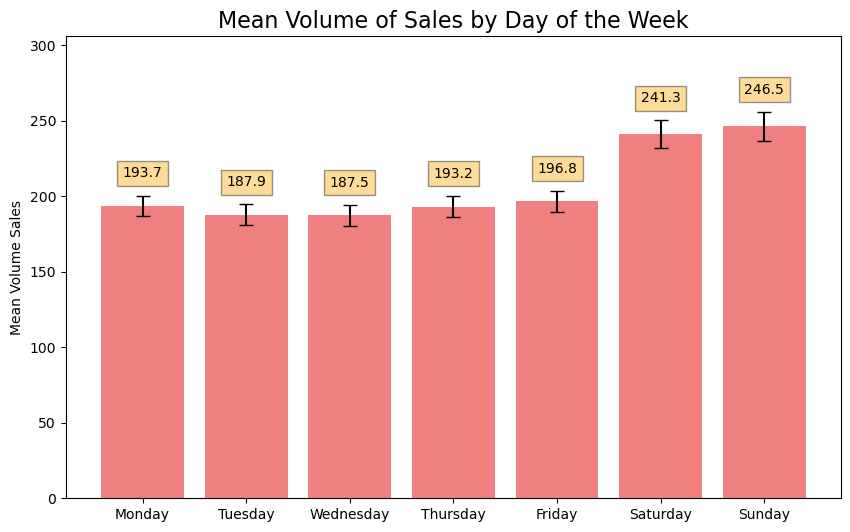

                 mean         std  count    stderr         ci
month                                                        
January    167.972552  103.523700    756  3.765121   7.391350
February   185.515356  110.485206    705  4.161114   8.169678
March      182.284023  109.335302    759  3.968620   7.790792
April      197.351662  125.925358    731  4.657518   9.143727
May        211.430539  138.076333    736  5.089561   9.991810
June       226.627640  149.768740    745  5.487102  10.772046
July       271.829358  180.271819    904  5.995752  11.767229
August     288.522492  183.156301    756  6.661330  13.076931
September  213.935441  126.514041    747  4.628907   9.087234
October    210.002890  128.778626    777  4.619907   9.068997
November   154.596543  107.469938    886  3.610523   7.086187
December   169.640144  164.544768    832  5.704563  11.197047


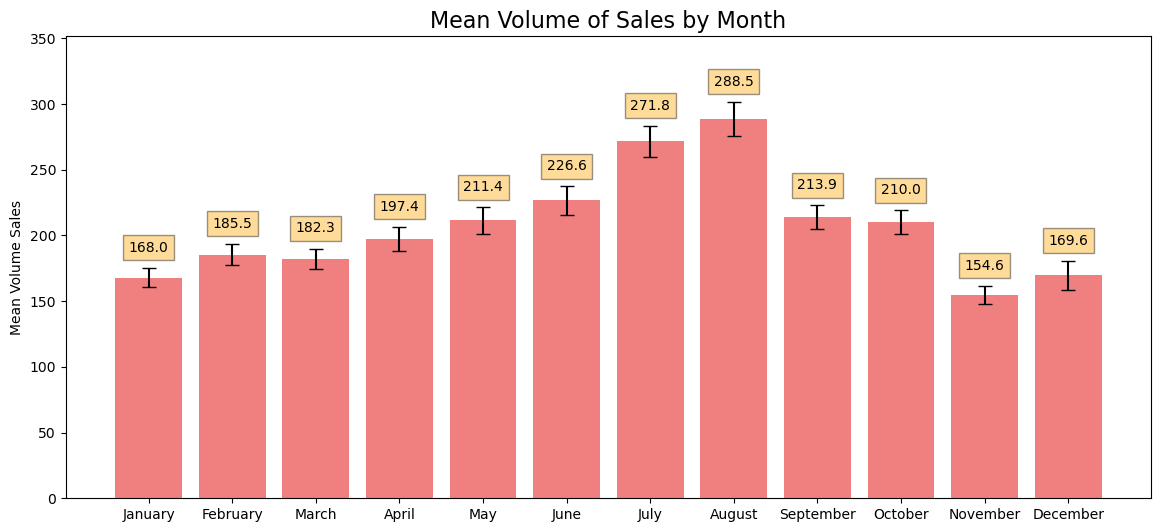

In [99]:
# Calculate statistics per weekday
weekday_stats = sales_period.groupby("day of the week",observed=True)["Sales Volume"].agg(
    ["mean", "std", "count"], 
)
weekday_stats["stderr"] = weekday_stats["std"] / np.sqrt(weekday_stats["count"])

# Calculate confidence intervals (95%)
confidence_level = 0.95
degrees_of_freedom = weekday_stats["count"] - 1
t_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
weekday_stats["ci"] = t_value * weekday_stats["stderr"]
print(weekday_stats)

fig, ax = plt.subplots(figsize=(10, 6))
# plt.bar(sales_data["Weekday_Name"], sales_data["Sales Volume"], color="skyblue")
plt.bar(weekday_stats.index, height=weekday_stats["mean"], yerr=weekday_stats["ci"], capsize=5, color="lightcoral")
ax.set_ylim(0, weekday_stats["mean"].max() + weekday_stats["ci"].max() + 50)  # Adjust y-axis limit to accommodate error bars
plt.ylabel("Mean Volume Sales")
plt.title("Mean Volume of Sales by Day of the Week", color="black", fontsize=16)
def add_labels(ax, stats):
    for i, row in stats.iterrows():
        ax.text(
            i,
            row["mean"] + row["ci"] + 10,  # place label above the error bar top (height + ci)
            f"{row['mean']:.1f}",
            ha="center",
            va="bottom",
            bbox=dict(facecolor='orange', alpha=0.4)  # Adding a red box around text, alpha is transparency
        )

add_labels(ax, weekday_stats)
plt.show()

# Calculate statistics per month
month_stats = sales_period.groupby("month", observed=True)["Sales Volume"].agg(
    ["mean", "std", "count"]
)
month_stats["stderr"] = month_stats["std"] / np.sqrt(month_stats["count"])

# Calculate confidence intervals (95%)
confidence_level = 0.95
degrees_of_freedom = month_stats["count"] - 1
t_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
month_stats["ci"] = t_value * month_stats["stderr"]
print(month_stats)

fig, ax = plt.subplots(figsize=(14, 6))
plt.bar(month_stats.index, height=month_stats["mean"], yerr=month_stats["ci"], capsize=5, color="lightcoral")
ax.set_ylim(0, month_stats["mean"].max() + month_stats["ci"].max() + 50)  # Adjust y-axis limit to accommodate error bars
plt.ylabel("Mean Volume Sales")
plt.title("Mean Volume of Sales by Month", color="black", fontsize=16)
def add_labels(ax, stats):
    for i, row in stats.iterrows():
        ax.text(
            i,
            row["mean"] + row["ci"] + 10,  # place label above the error bar top (height + ci)
            f"{row['mean']:.1f}",
            ha="center",
            va="bottom",
            bbox=dict(facecolor='orange', alpha=0.4)  # Adding a red box around text, alpha is transparency
        )

add_labels(ax, month_stats)
plt.show()

Graphical distribution of average sales by product by year, month and day of the week

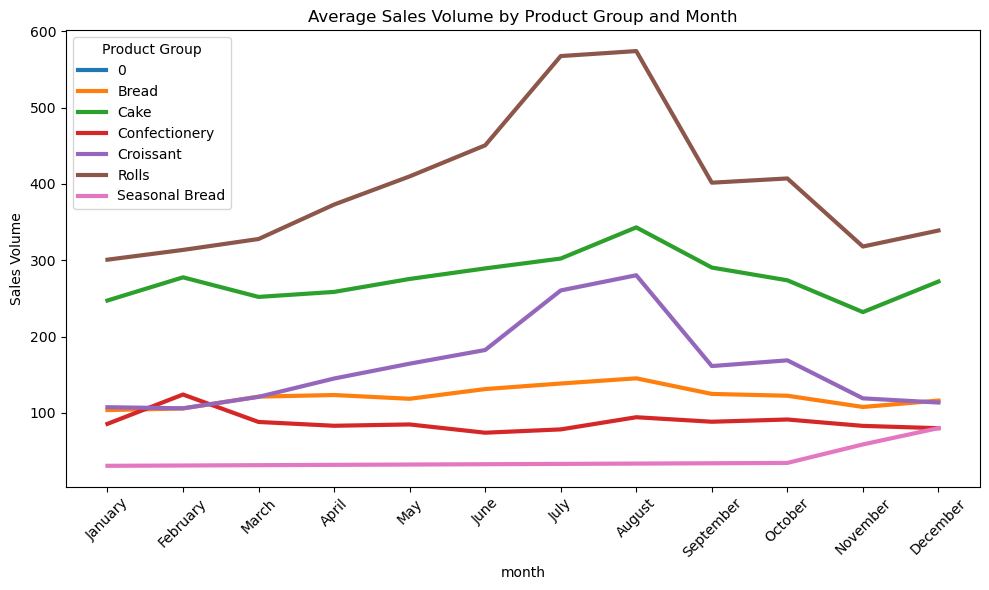

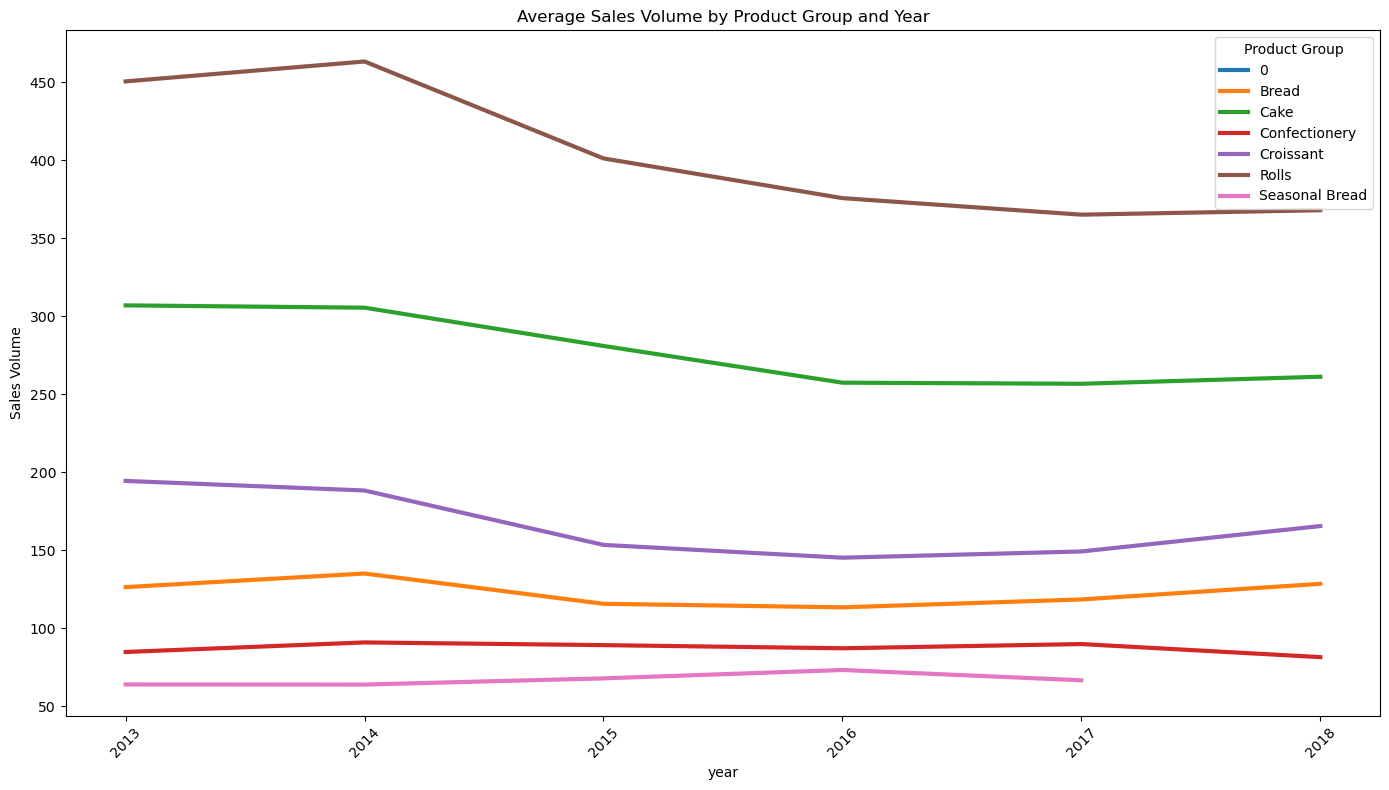

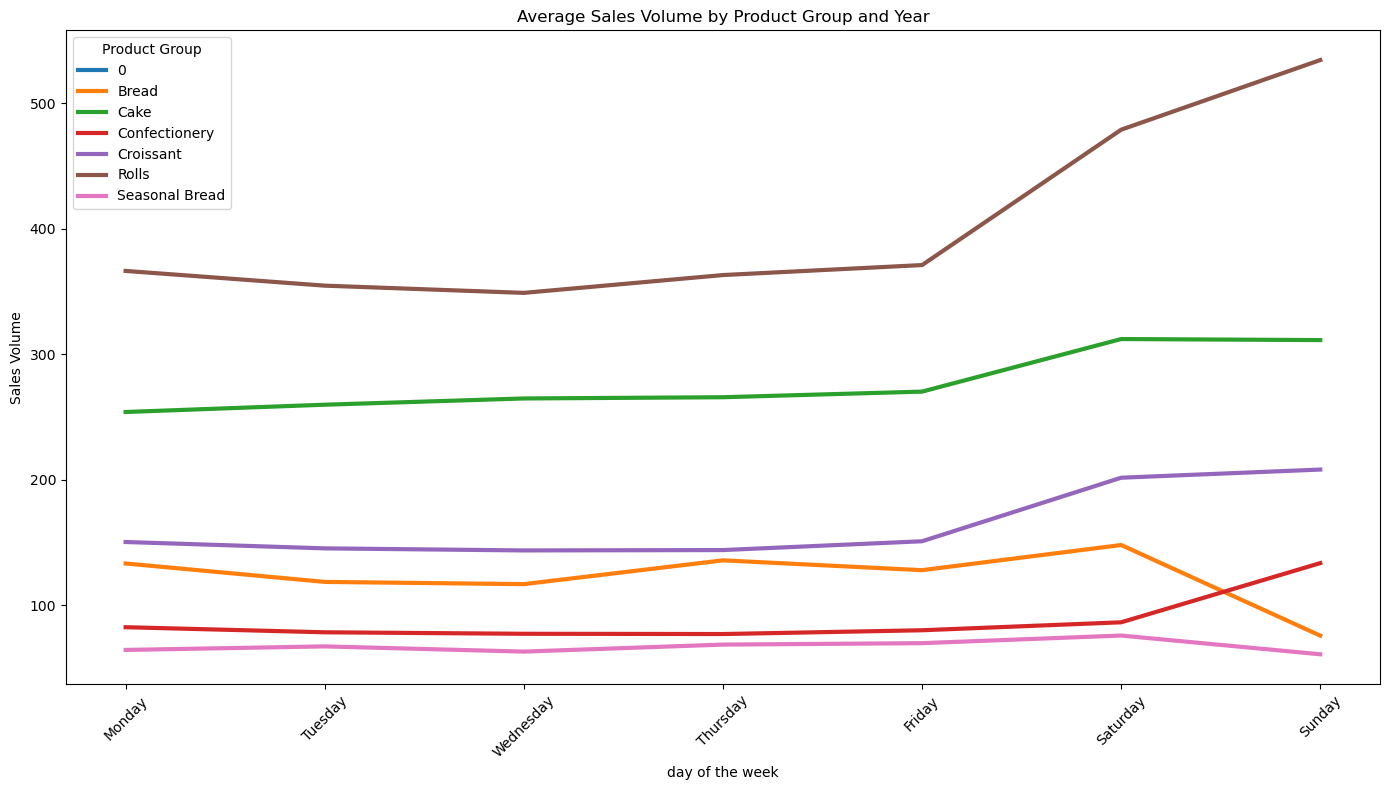

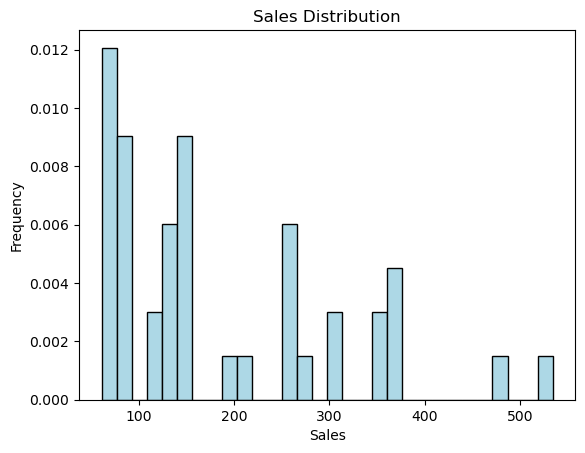

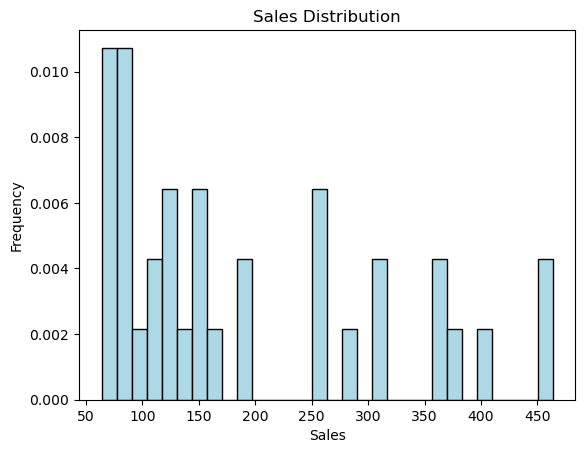

Kurtosis :  0.31193700241280187
Skewness :  1.0397561247214513
Year more sales volume:  2014
Month higher sales:  July
Weekday with higher sales:  Sunday


In [ ]:

monthly_avg_sales = sales_period.groupby(["month", "Product Group"], as_index=False, observed=True)["Sales Volume"].mean()
yearly_avg_sales = sales_period.groupby(["year", "Product Group"], as_index=False, observed=True)["Sales Volume"].mean()
day_of_week_avg_sales = sales_period.groupby(["day of the week", "Product Group"], as_index=False, observed=True)["Sales Volume"].mean()

## Arrange months in calendar order
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
monthly_avg_sales["month"] = pd.Categorical(monthly_avg_sales["month"], categories=month_order, ordered=True)

day_order = [
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]  
day_of_week_avg_sales["day of the week"] = pd.Categorical(day_of_week_avg_sales["day of the week"], categories=day_order, ordered=True)

## The bar plots have been commented out and replaced with line plots for better trend visualization. ##

# #Bar plot monthly average sales volume by product group

# plt.figure(figsize=(10, 6))
# sns.barplot(
#     data=monthly_avg_sales,
#     x="month",
#     y="Sales Volume",
#     hue="Product Group"   # separates months with color
# )
# plt.title("Average Sales Volume by Product Group and Month")
# plt.xlabel("month")
# plt.ylabel("Sales Volume")
# plt.legend(title="Product Group")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# Line plot monthly average sales volume by product group
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=monthly_avg_sales,
    x="month",
    y="Sales Volume",
    hue="Product Group",   # separates months with color
    linewidth=3
)
plt.title("Average Sales Volume by Product Group and Month")
plt.xlabel("month")
plt.ylabel("Sales Volume")
plt.legend(title="Product Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# #Bar plot yearly average sales volume by product group
# plt.figure(figsize=(12, 8))
# sns.barplot(
#     data=yearly_avg_sales,
#     x="year",
#     y="Sales Volume",
#     hue="Product Group"   
# )
# plt.title("Average Sales Volume by Product Group and Year")
# plt.xlabel("year")
# plt.ylabel("Sales Volume")
# plt.legend(title="Product Group")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# Line plot monthly average sales volume by product group
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=yearly_avg_sales,
    x="year",
    y="Sales Volume",
    hue="Product Group",   
    linewidth=3
)
plt.title("Average Sales Volume by Product Group and Year")
plt.xlabel("year")
plt.ylabel("Sales Volume")
plt.legend(title="Product Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# # Bar plot day of the week average sales volume by product group
# plt.figure(figsize=(12, 8))
# sns.barplot(
#     data=day_of_week_avg_sales,
#     x="day of the week",
#     y="Sales Volume",
#     hue="Product Group"   
# )
# plt.title("Average Sales Volume by Product Group and day of the week")
# plt.xlabel("day of the week")
# plt.ylabel("Sales Volume")
# plt.legend(title="Product Group")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

#Line plot day of the week average sales volume by product group
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=day_of_week_avg_sales,
    x="day of the week",
    y="Sales Volume",
    hue="Product Group",   
    linewidth=3
)
plt.title("Average Sales Volume by Product Group and Year")
plt.xlabel("day of the week")
plt.ylabel("Sales Volume")
plt.legend(title="Product Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# yearly_tot_sales = sales_period.groupby(["year", "Product Group"], as_index=False)["Sales Volume"].sum()

# #Bar plot yearly average sales volume by product group
# plt.figure(figsize=(12, 8))
# sns.barplot(
#     data=yearly_tot_sales,
#     x="year",
#     y="Sales Volume",
#     hue="Product Group"   
# )
# plt.title("Total Sales Volume by Product Group and Year")
# plt.xlabel("year")
# plt.ylabel("Sales Volume")
# plt.legend(title="Product Group")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


# #Line plot monthly average sales volume by product group
# plt.figure(figsize=(14, 8))
# sns.lineplot(
#     data=yearly_tot_sales,
#     x="year",
#     y="Sales Volume",
#     hue="Product Group",   
#     linewidth=3
# )
# plt.title("Total Sales Volume by Product Group and Year")
# plt.xlabel("year")
# plt.ylabel("Sales Volume")
# plt.legend(title="Product Group")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

day_of_week_avg_sales['Sales Volume'].plot(kind='hist', bins=30, facecolor='lightblue', edgecolor='black', density=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.show()


yearly_avg_sales['Sales Volume'].plot(kind='hist', bins=30, facecolor='lightblue', edgecolor='black', density=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.show()

print("Kurtosis : ", day_of_week_avg_sales['Sales Volume'].kurt())
print("Skewness : ", day_of_week_avg_sales['Sales Volume'].skew())

print("Year more sales volume: ", sales_period.groupby(['year'], observed=True)['Sales Volume'].sum().idxmax())
print("Month higher sales: ", sales_period.groupby(['month'],observed=True)['Sales Volume'].sum().idxmax())
print("Weekday with higher sales: ", sales_period.groupby(['day of the week'],observed=True)['Sales Volume'].sum().idxmax())




Correlation between temperature and sales

In [110]:
correlation = sales_period[['Temperature', 'Sales Volume']].corr()
print(correlation)
corr_cloud_sales = sales_period[['Cloud Cover', 'Sales Volume']].corr()
print(corr_cloud_sales)
corr_weathercode_sales = sales_period[['Weather Code', 'Sales Volume']].corr()
print(corr_weathercode_sales)

              Temperature  Sales Volume
Temperature      1.000000      0.222935
Sales Volume     0.222935      1.000000
              Cloud Cover  Sales Volume
Cloud Cover      1.000000     -0.089916
Sales Volume    -0.089916      1.000000
              Weather Code  Sales Volume
Weather Code      1.000000     -0.010091
Sales Volume     -0.010091      1.000000


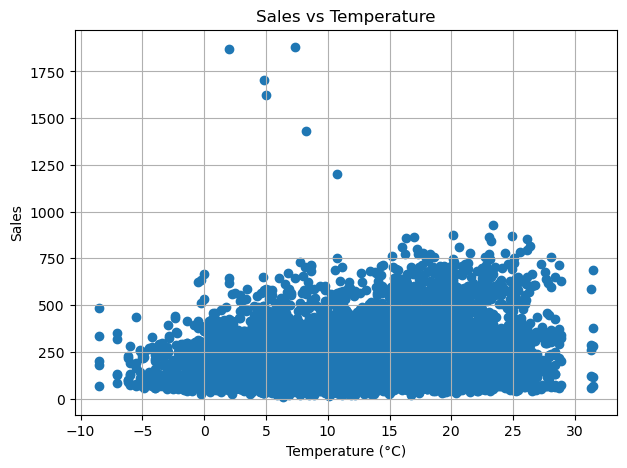

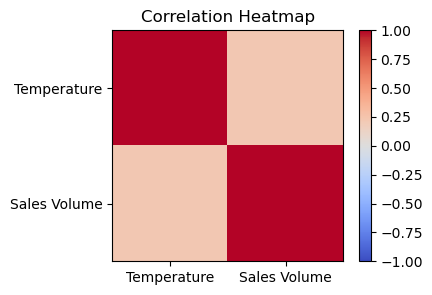

In [108]:
# Scatter plot of Sales vs Temperature
plt.figure(figsize=(7, 5))
plt.scatter(sales_period["Temperature"], sales_period["Sales Volume"])
plt.title("Sales vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# Correlation heatmap (simple)
fig, ax = plt.subplots(figsize=(4, 3))
cax = ax.imshow(correlation, cmap="coolwarm", vmin=-1, vmax=1)
ax.set_xticks(range(len(correlation.columns)))
ax.set_yticks(range(len(correlation.index)))
ax.set_xticklabels(correlation.columns)
ax.set_yticklabels(correlation.index)
plt.title("Correlation Heatmap")
plt.colorbar(cax)
plt.show()